In [19]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
from IPython.display import Image
import plotly.graph_objects as go
import pandas as pd

In [2]:
DIRECTORY = '../data/preprocessed'

In [20]:
def get_text(filters):
    amharic = []
    sub_dir = [DIRECTORY + '/' + i for i in os.listdir(DIRECTORY)]
    
    for d in sub_dir:
        with open(d) as fp:
            line = fp.readline()
            while line:
                sent = ''.join( c for c in line if  c not in filters)
                amharic.append( sent.rstrip().strip())
                line = fp.readline()

    return amharic


In [21]:
filters = '!"#$%&()*+,-/:;<=>?@[\\]^_`{|}~\t\n።”፤፦’፥፣.“‘·\'—\t\n'
amharic = get_text(filters)
print("num amharic sentences: ", len(amharic))

data = pd.DataFrame({'text': amharic})
data[:5]

num amharic sentences:  5162610


,text
0,ስርአት ካልተጠናከረ ከፍተኛ ብልሽት ይፈጠራል ለዛሬ ለማውሳት የምፈልገው ...
1,አቢሳ ከያሾብአም ጋር የሚመጣጠን ጀብዱ ስለፈፀመ ሶስቱ ሀያላን ሰዎች ካላ...
2,ስለዚህም በተለይ በቆጂን እንደስሟ ሊያነሷትና ሊያስከብሯት በሚችሉ የኢንቨ...
3,ሰብአዊ ድክመቶች በመጀመሪያው ትዳሩ ውስጥ እንደነበሩ ሁሉ በአዲሱ ዝምድና...
4,በሚጮኽበት ቤተሰብ ውስጥ ያደገ ልጅ መጮኽን የቤተሰብ የመግባቢያ ቋንቋ አ...


In [22]:
data["char_length"] = [len(i) for i in data.text]

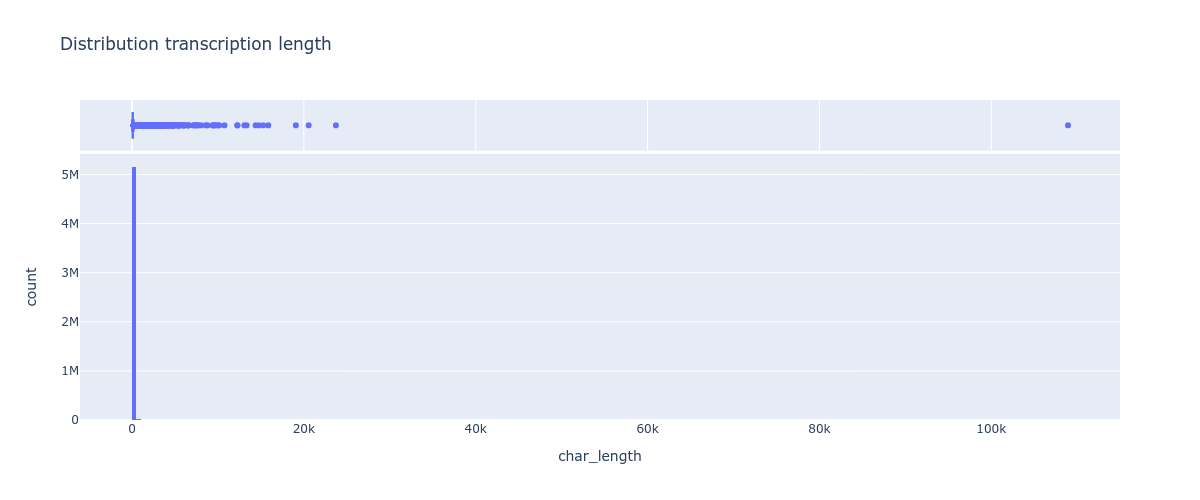

In [23]:
fig = px.histogram(data, x="char_length", marginal="box", nbins=500,
                   title='Distribution transcription length',)
Image(pio.to_image(fig, format='png', width=1200))

Most transcripts range in length from 30 to 70 characters. This includes rows without transcription and others with more than 150 characters long transcription.

In [24]:
initial_size = data.shape[0]
data = data[data['char_length'] > 10]
print(f'percentage of data lost after removing less than 10 character transcriptions: '
      f'{(((initial_size-data.shape[0])/initial_size) * 100):.4f}%')

percentage of data lost after removing less than 10 character transcriptions: 2.0065%


In [25]:
initial_size = data.shape[0]
data = data[data['char_length'] < 125]
print(f'percentage of data lost after removing more than 130 character transcriptions: '
      f'{(((initial_size-data.shape[0])/initial_size) * 100):.4f}%')

percentage of data lost after removing more than 130 character transcriptions: 9.8020%


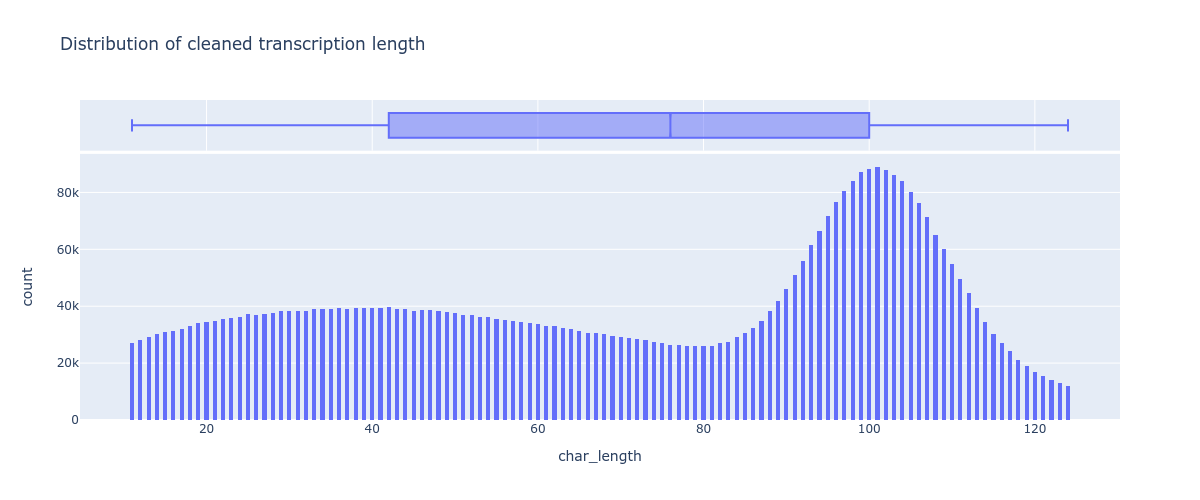

In [26]:
fig = px.histogram(data, x="char_length", marginal="box", nbins=500,
                   title='Distribution of cleaned transcription length')
Image(pio.to_image(fig, format='png', width=1200))


In [ ]:
words_in_data = pd.DataFrame(' '.join(data['text']).split())
words_in_data.columns = ['word']
words_data = words_in_data.groupby(['word']).agg({'word': 'count'})
words_data.columns = ['counts']
words_data.reset_index(inplace=True)
words_data = words_data.sort_values("counts", ascending=False)
words_data.head()

In [18]:
data.to_csv('../data/data.csv')